In [ ]:
import cv2
import numpy as np

In [ ]:
SVM, MTCNN and Facenet

In [ ]:
%cd '/content/drive/MyDrive/SET-2'

/content/drive/MyDrive/SET-2


#MTCNN and FaceNet

In [ ]:
%pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 17.7 MB/s eta 0:00:00


In [ ]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10369 sha256=22a9d83382e2ba0ae897b4a0f9c03883d97b59d01c1c37ae42541d66b31de9c6
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [ ]:
from mtcnn import MTCNN
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import numpy as np

In [ ]:
from keras_facenet import FaceNet

In [ ]:
detector = MTCNN()

In [ ]:
class Faceloading:
  def __init__(self,directory):
    self.directory = directory
    self.target_size = (160,160)
    self.X = []
    self.Y = []
    self.detector = MTCNN()

  def extract_faces(self,filename):
    img = cv.imread(filename)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    x,y,w,h = detector.detect_faces(img)[0]['box']
    x,y = abs(x), abs(y)
    face = img[y:y+h,x:x+w]
    face_arr = cv.resize(face,self.target_size)
    return face_arr

  def load_faces(self,dir):
    FACES = []
    for im_name in os.listdir(dir):
      try:
        path = dir+im_name
        single_face = self.extract_faces(path)
        FACES.append(single_face)
      except Exception as e:
        pass
    return FACES

  def load_classes(self):
    for sub_dir in os.listdir(self.directory):
      path = self.directory + '/' + sub_dir + '/'
      FACES = self.load_faces(path)
      labels = [sub_dir for _ in range(len(FACES))]
      print(f"Loaded succefully:{len(labels)}")
      self.X.extend(FACES)
      self.Y.extend(labels)

    return np.asarray(self.X), np.asarray(self.Y)

  def plot_images(self):
    plt.figure(figsize=(18,16))
    for num,image in enumerate(self.X):
      ncols=5
      nrows = len(self.Y)//ncols + 3
      plt.subplot(nrows,ncols,num+1)
      plt.imshow(image)
      plt.axis('off')




In [ ]:
faceloading = Faceloading("ClassDataset/")
X,Y = faceloading.load_classes()

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 21ms/step
Loaded succefully:50
1/1 [==============================] - 0s 18ms/step
Loaded succefully:50
1/1 [==============================] - 0s 22ms/step
Loaded succefully:50
1/1 [==============================] - 0s 29ms/step
Loaded succefully:50
1/1 [==============================] - 0s 31ms/step
Loaded succefully:50
1/1 [==============================] - 0s 43ms/step
Loaded succefully:50
1/1 [==============================] - 0s 21ms/step
Loaded succefully:50
1/1 [==============================] - 0s 22ms/step
Loaded succefully:50
1/1 [==============================] - 0s 21ms/step
Loaded succefully:50


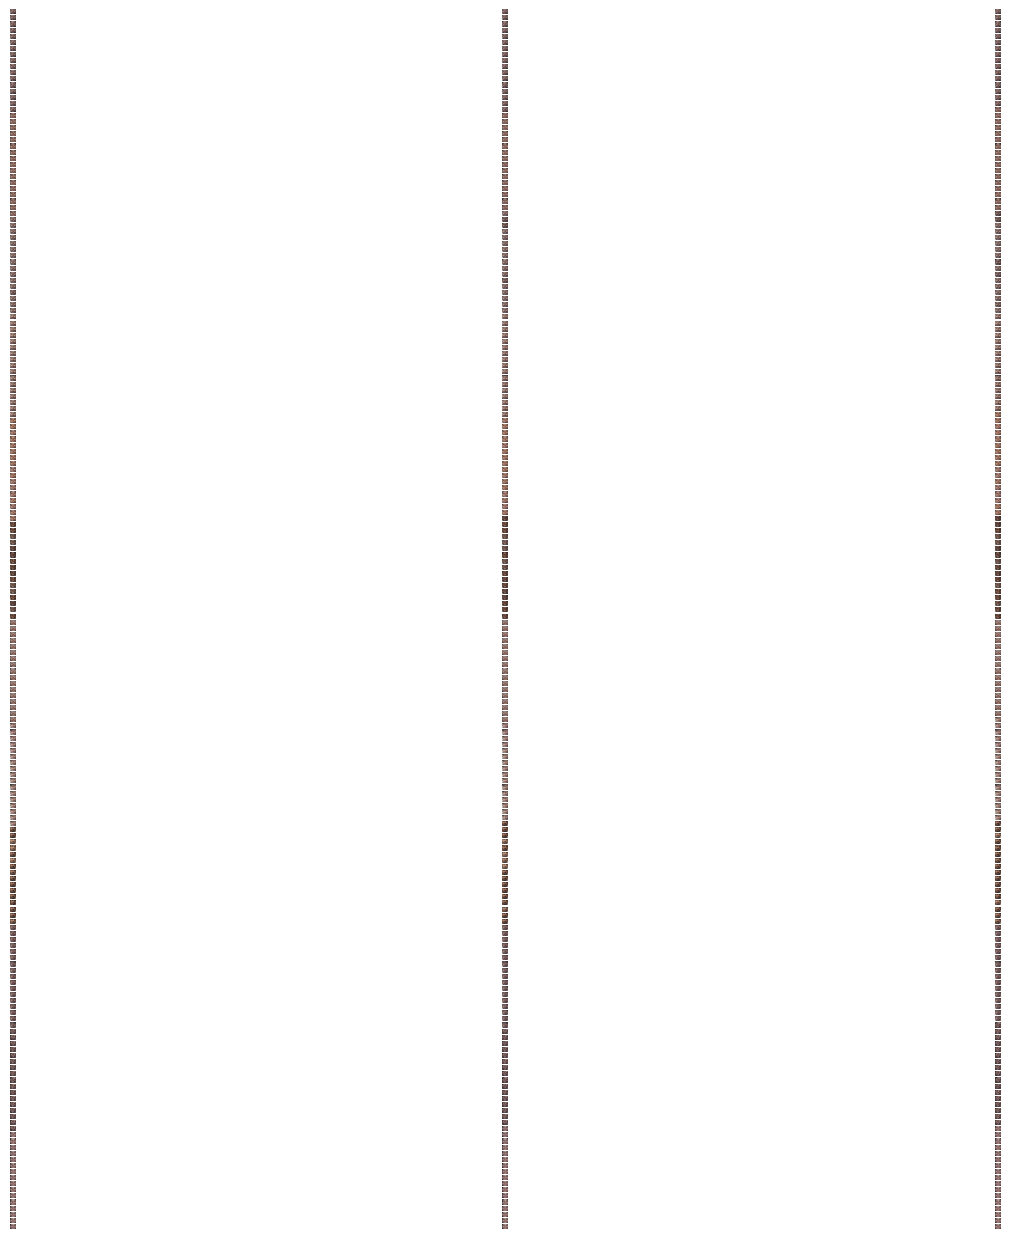

In [ ]:
faceloading.plot_images()

In [ ]:
Y

array(['Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi',
       'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi',
       'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi',
       'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi',
       'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi',
       'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi',
       'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi',
       'Rushi', 'priyanka', 'priyanka', 'priyanka', 'priyanka',
       'priyanka', 'priyanka', 'priyanka', 'priyanka', 'priyanka',
       'priyanka', 'priyanka', 'priyanka', 'priyanka', 'priyanka',
       'priyanka', 'priyanka', 'priyanka', 'priyanka', 'priyanka',
       'priyanka', 'priyanka', 'priyanka', 'priyanka', 'priyanka',
       'priyanka', 'priyanka', 'priyanka', 'priyanka', 'priyanka',
       'priyanka', 'priyanka', 'priyanka', 'priyanka', 'priyanka',
       'priyanka', 'priyanka', 'priyanka', '

In [ ]:
embedder = FaceNet()
def get_embedding(face_img):
  face_img = face_img.astype('float32')#3d img
  face_img = np.expand_dims(face_img,axis=0)#convert 3d img to 4D img(160x160x3)
  yhat = embedder.embeddings(face_img)
  return yhat[0]#512D image(1x1x1x1)

In [ ]:
EMBEDDED_X = []
for img in X:
  EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 29ms/step


In [ ]:
np.savez_compressed('faces_embedding_done_4classes.npz',EMBEDDED_X,Y)

In [ ]:
Y

array(['Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi',
       'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi',
       'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi',
       'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi',
       'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi',
       'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi',
       'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi', 'Rushi',
       'Rushi', 'priyanka', 'priyanka', 'priyanka', 'priyanka',
       'priyanka', 'priyanka', 'priyanka', 'priyanka', 'priyanka',
       'priyanka', 'priyanka', 'priyanka', 'priyanka', 'priyanka',
       'priyanka', 'priyanka', 'priyanka', 'priyanka', 'priyanka',
       'priyanka', 'priyanka', 'priyanka', 'priyanka', 'priyanka',
       'priyanka', 'priyanka', 'priyanka', 'priyanka', 'priyanka',
       'priyanka', 'priyanka', 'priyanka', 'priyanka', 'priyanka',
       'priyanka', 'priyanka', 'priyanka', '

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(EMBEDDED_X,Y,shuffle=True,random_state=17)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear',probability = True )
model.fit(X_train,Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train,ypreds_train))
print(accuracy_score(Y_test,ypreds_test))

1.0
1.0


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_train, ypreds_train))
print(confusion_matrix(Y_test,ypreds_test))

[[37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 38  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 39  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

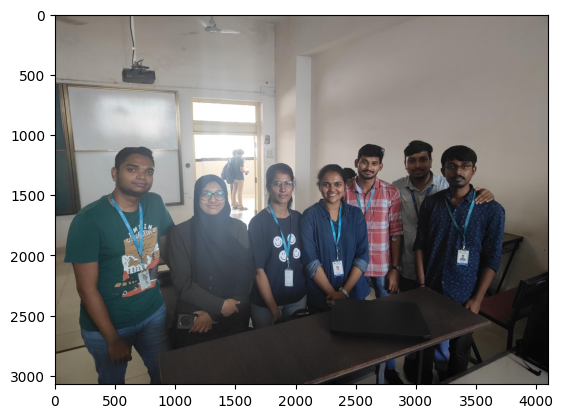

In [ ]:
test_grp_img = cv.imread("/content/drive/MyDrive/YOLO implementation/ATGS.v3i.yolov8/testing/Testimg_2.jpeg")
test_grp_img = cv.cvtColor(test_grp_img,cv.COLOR_BGR2RGB)
plt.imshow(test_grp_img)

In [ ]:
op = detector.detect_faces(test_grp_img)
op

NameError: name 'detector' is not defined

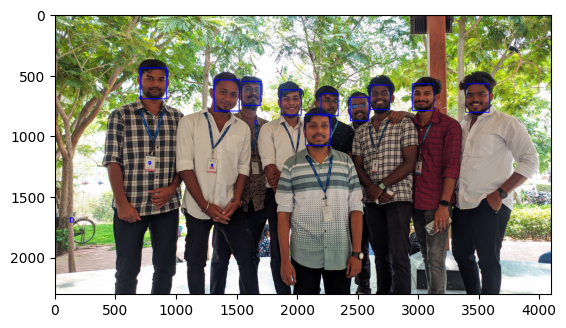

In [ ]:
for face in op:
  x,y,width,height = face['box']
  cv.rectangle(test_grp_img,pt1=(x,y),pt2=(x+width,y+height),color=(0,0,255),thickness=5)
plt.imshow(test_grp_img)

In [ ]:
import pandas as pd
from datetime import datetime
import os

def convert_to_Excel(names):
    # Check if the file exists
    existing_file = "attendance1.xlsx"
    if os.path.isfile(existing_file):
        # Read existing Excel file
        df = pd.read_excel(existing_file)
    else:
        # Create a new DataFrame if the file doesn't exist
        df = pd.DataFrame(columns=["Name", datetime.today().strftime('%y/%m/%d')])

    # Get today's date
    today_date = datetime.today().strftime('%y/%m/%d')

    # Create DataFrame for new names
    new_data = pd.DataFrame([{"Name": name, today_date: "Present"} for name in names])

    # Concatenate existing DataFrame with new DataFrame
    df = pd.concat([df, new_data], ignore_index=True)

    # Export DataFrame to the Excel file
    df.to_excel(existing_file, index=False)

# Test the function
new_names = ["John", "Alice", "Bob"]
append_and_export(new_names)


In [ ]:
pred_names = []
for i in range(len(op)):
  x,y,w,h = detector.detect_faces(test_grp_img)[i]['box']
  test_img = cv.resize(test_grp_img,(160,160))
  test_im = get_embedding(test_grp_img)
  test_im = [test_im]
  ypreds = model.predict(test_im)
  pred_name = encoder.inverse_transform(ypreds)
  pred_names.append(pred_names)
  convert_to_excel(pred_names)





1/1 [==============================] - 0s 30ms/step
['Balanandha']
1/1 [==============================] - 0s 29ms/step
['Balanandha']
1/1 [==============================] - 0s 30ms/step
['Balanandha']
1/1 [==============================] - 0s 28ms/step
['Balanandha']
1/1 [==============================] - 0s 31ms/step
['Balanandha']
1/1 [==============================] - 0s 29ms/step
['Balanandha']
1/1 [==============================] - 0s 29ms/step
['Balanandha']
1/1 [==============================] - 0s 46ms/step
['Balanandha']
1/1 [==============================] - 0s 36ms/step
['Balanandha']
1/1 [==============================] - 0s 29ms/step
['Balanandha']
1/1 [==============================] - 0s 47ms/step
['Balanandha']
1/1 [==============================] - 0s 32ms/step
['Balanandha']
1/1 [==============================] - 0s 31ms/step
['Balanandha']
1/1 [==============================] - 0s 50ms/step
['Balanandha']
1/1 [==============================] - 0s 32ms/step
['Balanand

KeyboardInterrupt: 

In [ ]:
for face in op:
  x,y,w,h = detector.detect_faces(test_grp_img)[0]['box']
  output = get_embedding(test_grp_img)

1/1 [==============================] - 0s 65ms/step


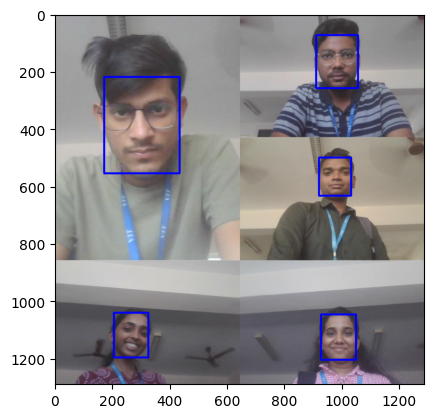

In [ ]:
x,y,w,h = detector.detect_faces(test_grp_img)[0]['box']
test_img = cv.resize(test_grp_img,(160,160))
plt.imshow(test_grp_img)
test_im = get_embedding(test_grp_img)

In [ ]:
test_im = [test_im]
test_im

[array([-3.80074494e-02, -4.23665047e-02, -3.95067334e-02,  1.04959540e-01,
         1.00467736e-02, -1.56115051e-02, -6.91239387e-02,  3.84562872e-02,
         2.10972931e-02,  8.09133574e-02,  2.53288727e-02,  1.05619729e-01,
        -4.04886529e-02,  6.13143072e-02, -4.00750153e-02, -6.59397710e-03,
         4.84541357e-02,  8.36147666e-02,  5.71531709e-04, -1.06639462e-02,
         1.27699040e-02,  7.91445374e-02,  6.04079589e-02, -5.29376306e-02,
        -8.52810070e-02,  4.30657528e-03,  2.11742595e-02,  5.24712615e-02,
         3.99312153e-02, -1.16489427e-02, -8.17848071e-02, -4.03270647e-02,
         6.81861490e-02, -8.07771906e-02, -3.79610136e-02, -1.63240656e-02,
        -5.96332699e-02, -3.23579684e-02,  1.54779097e-02, -1.30370818e-02,
        -6.87712803e-02,  2.29306258e-02, -3.80066293e-03, -2.19032895e-02,
        -8.72074440e-03,  4.56556901e-02,  3.28503326e-02,  4.65159975e-02,
        -5.07241227e-02,  5.35778590e-02, -2.14975309e-02,  4.32296693e-02,
         8.3

In [ ]:
ypreds = model.predict(test_im)
ypreds

array([0])

In [ ]:
pred_name = encoder.inverse_transform(ypreds)
pred_name

array(['Akhila'], dtype='<U11')

#convert to excel


In [ ]:
data = ["myname"]
converttoexcel(data)

ValueError: No engine for filetype: ''

In [ ]:
import pandas as pd

def converttoexcel():

    sample_data = [
    {"Name": "Sandeep", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Ragavan", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Akhil", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Deepak", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Gowtham", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Bhuvanesh", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Veera", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Balaji", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Akhila", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Adithi", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Priyanka", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Aniket", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Omkar", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Rushi", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Harshan", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Akshay A U", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Veera", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Avinash", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Devika", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"},
    {"Name": "Lakshaya", pd.Timestamp.today().strftime('%y/%m/%d'): "Present"}
]
    # Create a DataFrame from the data
    df = pd.DataFrame(sample_data, columns=["Name", pd.Timestamp.today().strftime('%y/%m/%d')])
    today_date = pd.Timestamp.today().strftime('%d_%m_%y')

    # Create the filename with the present date
    filename = f"attendance_{today_date}.xlsx"
    # Export DataFrame to an Excel file
    df.to_excel(filename, index=False)



# Export data to Excel file
# export_to_excel(sample_data, "attendance.xlsx")
converttoexcel()

In [ ]:
data = ["myname"]
converttoexcel()

ValueError: No engine for filetype: ''